In [52]:
import pandas as pd
import pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from html import unescape
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
data = pd.read_pickle('final_data.pkl')

In [3]:
print(data.head(5))

     overall      reviewerID        asin  unixReviewTime  \
246      4.0  A1KECIKIWDB4HH  0972683275      1282867200   
247      5.0  A2MQ47BBL7F6B6  0972683275      1267747200   
248      5.0   ANWW7PT6Z6MHD  0972683275      1265500800   
249      5.0  A2DEU0B3AUINV9  0972683275      1263168000   
250      4.0    AE8R1JSMJYIU  0972683275      1228694400   

                                              category  \
246  [Electronics, Accessories &amp; Supplies, Audi...   
247  [Electronics, Accessories &amp; Supplies, Audi...   
248  [Electronics, Accessories &amp; Supplies, Audi...   
249  [Electronics, Accessories &amp; Supplies, Audi...   
250  [Electronics, Accessories &amp; Supplies, Audi...   

                                           description  \
246  [The videosecu TV mount is a mounting solution...   
247  [The videosecu TV mount is a mounting solution...   
248  [The videosecu TV mount is a mounting solution...   
249  [The videosecu TV mount is a mounting solution...   


### EDA

In [4]:
##################To get Unique descriptions################
df2 = data.explode("description").drop_duplicates(subset=["description"])
df2.reset_index(drop=True, inplace=True)

In [5]:
total_reviews = len(data)
print("Number of reviews:",total_reviews)
print()
###Number of unique reviewers
no_unique_reviewers=len(data.reviewerID.unique())
print("Number of unique reviewers:",no_unique_reviewers)
print()
print("Proportion of unique reviewers:",float(no_unique_reviewers/total_reviews)*100)
print()
print ("Average rating score: ",round(data.overall.mean(),3))
#Number of positive reviews
pos=data[data['rating_category']=='positive']
neg=data[data['rating_category']=='negative']
neutral=data[data['rating_category']=='neutral']
print("Number of positive reviews:",len(pos))
#Number of negative reviews
print("Number of negative reviews:",len(neg))
#Number of neutral reviews
print("Number of neutral reviews:",len(neutral))


##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 
#data=data.rename(columns={'overall':'rating'})
class_counts = data.groupby('overall').size()
print(class_counts)


Number of reviews: 1071586

Number of unique reviewers: 815053

Proportion of unique reviewers: 76.06043751971377

Average rating score:  4.244
Number of positive reviews: 863229
Number of negative reviews: 142463
Number of neutral reviews: 65894
overall
1.0     96426
2.0     46037
3.0     65894
4.0    154501
5.0    708728
dtype: int64


Text(0, 0.5, 'Number of Reviews')

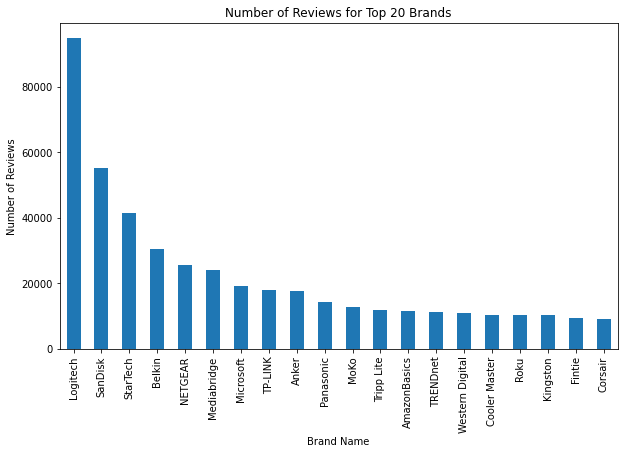

In [6]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = data["brand"].value_counts()
plt.figure(figsize=(10,6))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

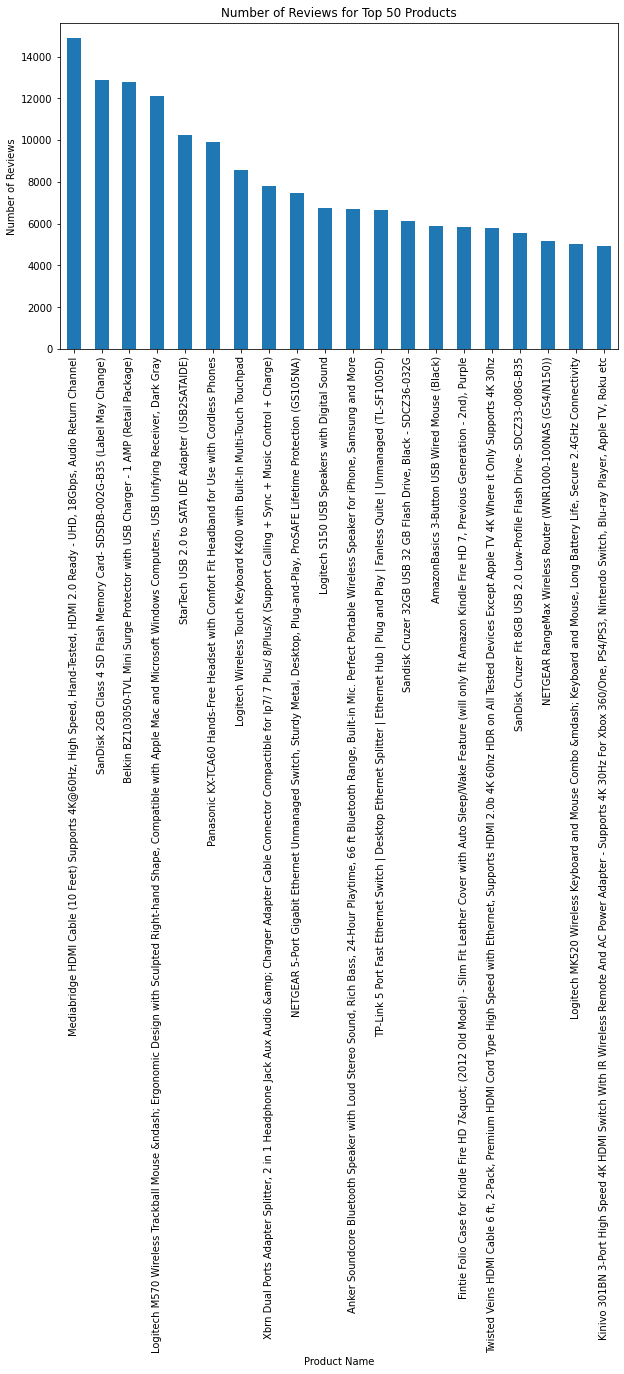

In [7]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = data["title"].value_counts()
plt.figure(figsize=(10,6))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [ ]:
year=data['time'].dt.year

##################################################################
# Total review for every year
#####################################################################
plt.figure(figsize = (10,6))
sns.countplot(year)
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
data[year].value_counts()



246        2010
247        2010
248        2010
249        2010
250        2008
           ... 
3368220    2017
3368221    2017
3368222    2017
3368223    2017
3368230    2018
Name: year, Length: 1071586, dtype: int64


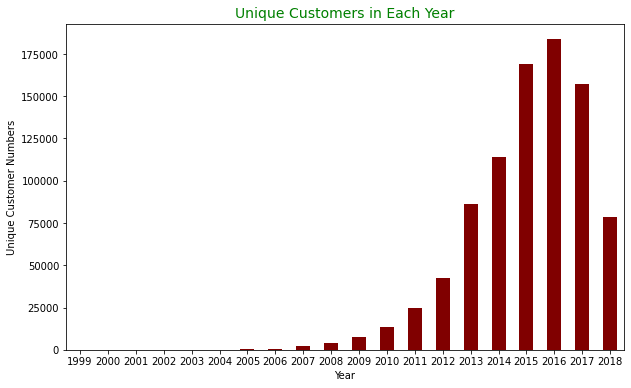

year
1999         1
2000        41
2001        46
2002        62
2003       137
2004       108
2005       277
2006       676
2007      2397
2008      3778
2009      7303
2010     13480
2011     24685
2012     42334
2013     86122
2014    113852
2015    169107
2016    183760
2017    156976
2018     78833
Name: reviewerID, dtype: int64


In [9]:
data['year']=year
print(data['year'])
# How many unique customers in each year?
unique_cust = data.groupby('year')['reviewerID'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, color = 'maroon')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

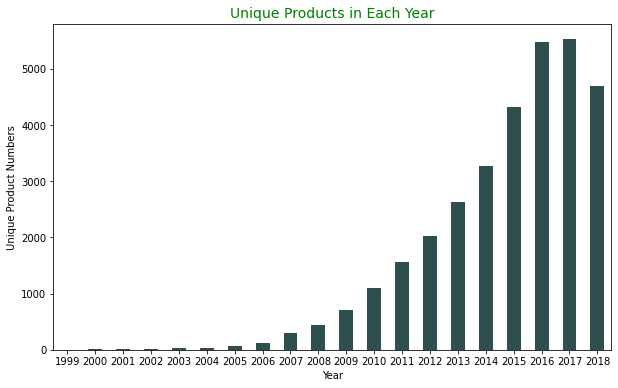

year
1999       1
2000       7
2001      10
2002      15
2003      27
2004      30
2005      69
2006     128
2007     299
2008     440
2009     709
2010    1094
2011    1563
2012    2022
2013    2633
2014    3262
2015    4312
2016    5481
2017    5527
2018    4701
Name: asin, dtype: int64


In [10]:
# How many unique products in each year?
unique_prod = data.groupby('year')['asin'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', color = 'darkslategrey', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

C:\Users\ameya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


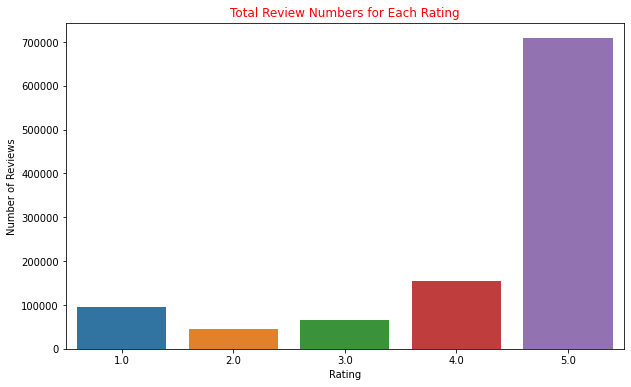

5.0    708728
4.0    154501
1.0     96426
3.0     65894
2.0     46037
Name: overall, dtype: int64

In [11]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(data['overall'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
data['overall'].value_counts()

<AxesSubplot:ylabel='overall'>

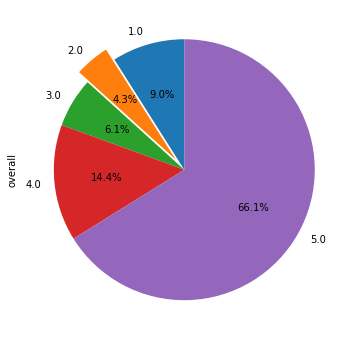

In [12]:
%matplotlib inline
plt.figure(figsize = (10,6))

data.groupby('overall').overall.count()
data.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

## Calcuating co-relation between products

In [16]:
relevant_reviewer_df=pd.read_pickle('relevant_reviewer_modified_also_buy.pkl')

In [18]:
product_group = relevant_reviewer_df.groupby('asin').size()
product_group[product_group>100].sort_values(ascending=False)

asin
B0019HL8Q8    14868
B000BQ7GW8    12906
B0015DYMVO    12792
B0043T7FXE    12101
B000VS4HDM    10245
              ...  
B01D7FGR2E      101
B005JK00XS      101
B000PDR27G      101
B00F4SIA9Q      101
B0045JLPOM      101
Length: 5511, dtype: int64

In [19]:
df3 = relevant_reviewer_df.groupby('asin').agg({'overall': ['mean']})
df3[df3[('overall', 'mean')]>2].sort_values(by=[('overall', 'mean')], ascending=True)

,overall
,mean
asin,
B002ZUI68G,2.011710
B01DISKZT6,2.031250
B01BRVFP9G,2.040000
B01GW56LP4,2.045455
B00WDARWRY,2.054054
...,...
B005IQY5NE,5.000000
B00M0RH270,5.000000


In [20]:
relevant_reviewer_df[relevant_reviewer_df['asin'].isin(['B00WDARWRY', 'B004M8SSZK', 'B000W9PD6A', 'B0019HL8Q8', 'B000BQ7GW8', 'B0015DYMVO', 'B0043T7FXE', 'B000VS4HDM'])].groupby('asin').agg({'overall': ['mean']})


,overall
,mean
asin,
B000BQ7GW8,4.570122
B000VS4HDM,4.562714
B000W9PD6A,1.000000
B0015DYMVO,4.209819
B0019HL8Q8,4.735203
B0043T7FXE,4.472440
B004M8SSZK,4.412574
B00WDARWRY,2.054054


In [21]:
review_per_asin_df = relevant_reviewer_df[relevant_reviewer_df['asin'].isin(['B00WDARWRY', 'B000BQ7GW8', 'B0015DYMVO', 'B0043T7FXE', 'B000VS4HDM'])].groupby(['asin', 'overall']).size().reset_index(name='counts')


In [22]:
also_bought_df = pd.DataFrame()
also_viewed_df = pd.DataFrame()
for product in relevant_reviewer_df.head(100000).asin.unique():
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    also_bought = []
    also_viewed = []
    for value in relevant_reviewer_df[relevant_reviewer_df['asin'] == product].also_buy:
        also_bought += value
    for value in relevant_reviewer_df[relevant_reviewer_df['asin'] == product].also_view:
        also_viewed += value
    df1['also_buy'] = also_bought
    df1['asin'] = product
    also_bought_df = pd.concat([also_bought_df, df1], axis=0)
    df2['also_buy'] = also_bought
    df2['asin'] = product
    also_viewed_df = pd.concat([also_viewed_df, df2], axis=0)


In [23]:
bought_grouped_df = also_bought_df.groupby(['also_buy', 'asin']).size().to_frame().reset_index()

In [24]:
bought_grouped_df.rename(columns={0:'freq'},inplace=True)

In [36]:
divisor_df = also_bought_df.groupby('asin').size().to_frame().reset_index()

In [37]:
divisor_df.rename(columns={0:'divisor'},inplace=True)

In [38]:
merged_bought_df=pd.merge(bought_grouped_df, divisor_df,on="asin",how="inner")

In [39]:
merged_bought_df['prob_also_buy_after_asin'] = merged_bought_df['freq']/merged_bought_df['divisor']

In [40]:
merged_bought_df[merged_bought_df['asin'].isin(['9831691113', '9831591534',])]

,also_buy,asin,freq,divisor,prob_also_buy_after_asin
7,9831591534,9831691113,20,20,1.0
8,9831691113,9831591534,17,17,1.0


In [41]:
merged_bought_size = merged_bought_df.groupby('also_buy').size()
merged_bought_size[merged_bought_size>5]

also_buy
B00005111M     9
B00005QT5U     7
B00005V52C    10
B000067RWK     7
B000067SCH     8
B00006B8BJ     6
B00009967Y     6
B0000BVYT3    33
B0000VYJRY    11
B0002J1KW6     8
B00066HL50    11
B00066HOWK    11
B00066HOXY     6
B00066HP2E     7
B0007Y6AJO     6
B000A0K2JO     6
B001CY0P7G     6
B001D1UTC4     7
B0029U2YSA     9
B00Z08TZNU    19
dtype: int64

In [42]:
merged_bought_df['prob_also_buy_after_asin'] = merged_bought_df['freq']/merged_bought_df['divisor']

In [44]:
df = merged_bought_df[merged_bought_df['also_buy'].isin(['9831691113', '9831591534', 'B00005V52C', 'B0000BVYT3', 'B0000VYJRY', 'B00066HL50', 'B00066HOWK'])]
pivot_df = df.pivot(columns='also_buy', values='prob_also_buy_after_asin')
pivot_df.columns
pivot_df.replace(np.nan, 0, inplace=True)
array = np.where(pivot_df>0.0, 1, 0)
pivot_df = pd.DataFrame(data=array)
pivot_df
corr_df = pivot_df.corr()
corr_df

,0,1,2,3,4,5,6
0,1.000000,-0.012987,-0.043702,-0.097590,-0.046176,-0.046176,-0.046176
1,-0.012987,1.000000,-0.043702,-0.097590,-0.046176,-0.046176,-0.046176
2,-0.043702,-0.043702,1.000000,-0.328395,-0.155383,-0.155383,-0.155383
3,-0.097590,-0.097590,-0.328395,1.000000,-0.346984,-0.346984,-0.346984
4,-0.046176,-0.046176,-0.155383,-0.346984,1.000000,-0.164179,-0.164179
5,-0.046176,-0.046176,-0.155383,-0.346984,-0.164179,1.000000,-0.164179
6,-0.046176,-0.046176,-0.155383,-0.346984,-0.164179,-0.164179,1.000000


Text(0.5, 1.0, 'Correlation of Top 7 Bought Products')

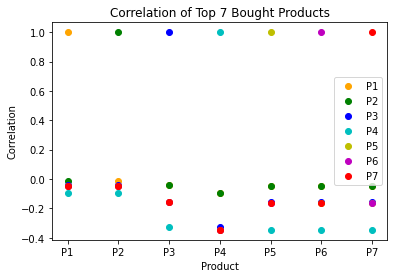

In [45]:
colors = ['orange', 'g', 'b', 'c', 'y', 'm', 'r']
# legend = ['9831691113', '9831591534', 'B00005V52C', 'B0000BVYT3', 'B0000VYJRY', 'B00066HL50', 'B00066HOWK']
legend = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']
for i, c, l in zip(corr_df.index, colors, legend):
    plt.scatter(legend, corr_df.loc[i,:], color=c, label=l)
plt.legend()
plt.xlabel('Product')
plt.ylabel('Correlation')
plt.title('Correlation of Top 7 Bought Products')

## Word Cloud

In [49]:
df_pos=relevant_reviewer_df[(relevant_reviewer_df['overall']==5) & (relevant_reviewer_df['asin']=='B000BQ7GW8')].sample(10000, replace=True)

In [50]:
df_neg=relevant_reviewer_df[(relevant_reviewer_df['overall']==1) & (relevant_reviewer_df['asin'].isin(['B00005141S']))].sample(10000, replace=True)

In [54]:
df_pos['reviewText']=df_pos['reviewText'].astype('str')

There are 855632 words in the combination of all review.


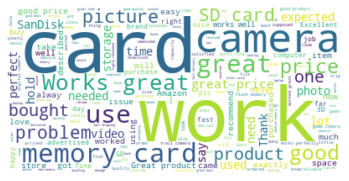

In [55]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in df_pos.reviewText)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("positivereview.png")


plt.show()

In [56]:
df_neg['reviewText']=df_neg['reviewText'].astype('str')

There are 5918966 words in the combination of all review.


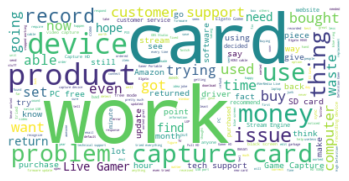

In [57]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in df_neg.reviewText)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("positivereview.png")


plt.show()